
## Задание 1

1.Загрузите датасет music_genre.csv.

2.Возьмите 20 тысяч случайных строк из датасета (все остальные задания выполняйте для этих 20 тысяч строк!!!)

3.Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.

4.Проверьте, есть ли а датасете строки, в которых значение в столбце artist_name – empty_field. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [1]:
# 1
full_dataset <- read.csv('/content/music_genre.csv', header=TRUE)

In [2]:
# 2

dataset <- full_dataset[sample(nrow(full_dataset), 20000),]
nrow(dataset)

[1] 20000

In [3]:
# 3
print(dataset[duplicated(dataset),][0])
dt <- unique(dataset)
print(dt[duplicated(dt),][0])

data frame with 0 columns and 2 rows
data frame with 0 columns and 0 rows


In [4]:
# 4

nrow(dt[dt$artist_name == 'empty_field',])
dt <- dt[!dt$artist_name == 'empty_field',]
nrow(dt[dt$artist_name == 'empty_field',])

[1] 994

[1] 0

Задание 2

1.Выведите долю каждого жанра в датасете.

2.Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

3.Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.

4.Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [5]:
# 1
prop.table(table(dt$music_genre))*100


            Alternative       Anime       Blues   Classical     Country 
 0.00526205  9.82950958 10.12418438  9.94001263  9.87686803 10.03999158 
 Electronic     Hip-Hop        Jazz         Rap        Rock 
10.01894338 10.26625973  9.87160598 10.02946748  9.99789518 

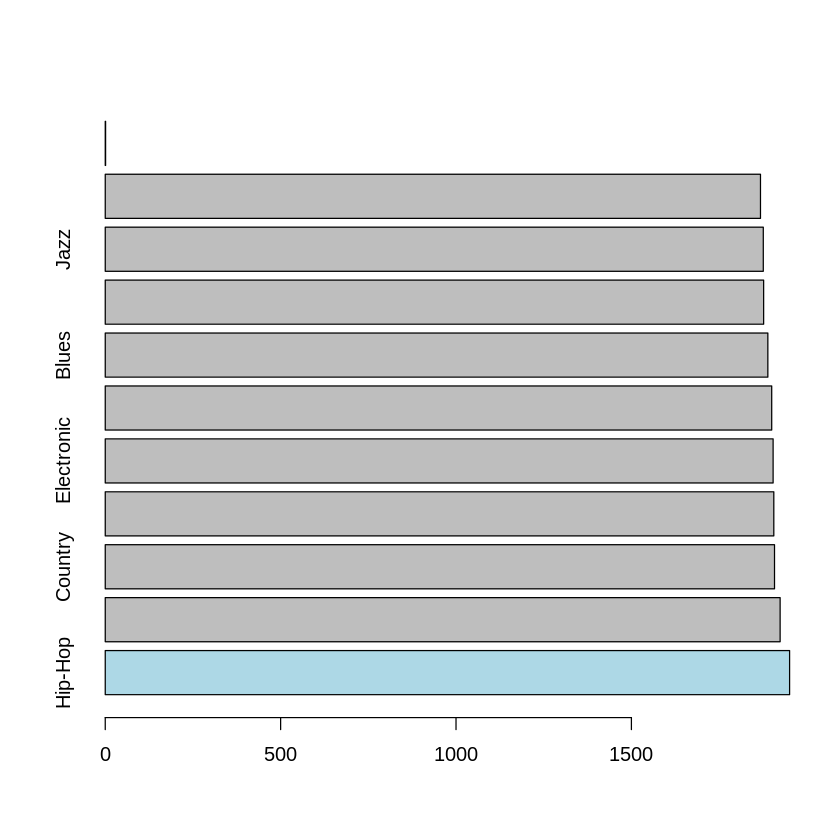

In [12]:
# 2
table <- table(dt$music_genre)
cols <- c("grey", "lightblue")[1+(table==max(table))]
sorted_table <- sort(table, decreasing = TRUE)
barplot(sorted_table, col=cols[order(table, decreasing = TRUE)], horiz=TRUE)


In [13]:
# 3
dance <- aggregate(dt$danceability, by=list(Genre=dt$music_genre), FUN=mean)

dance[]

Genre,x
<chr>,<dbl>
,NA
Alternative,0.5405116
Anime,0.4677661
Blues,0.5290731
Classical,0.3054970
Country,0.5795597
Electronic,0.6174821
Hip-Hop,0.7181430
Jazz,0.5790275


In [15]:
# 4
genres <- unique(dataset$music_genre)
genres <- genres[genres != ""]

min_maj <- vector(mode = "character", length = length(genres))
amount <- vector(mode = "integer", length = length(genres))

for (i in seq_along(genres)) {
  genre <- genres[i]
  subset_dataset <- subset(dataset, music_genre == genre)
  
  amount_major <- sum(subset_dataset$mode == 'Major', na.rm = TRUE)
  amount_minor <- sum(subset_dataset$mode == 'Minor', na.rm = TRUE)
  
  min_maj[i] <- ifelse(amount_major > amount_minor, "Major", "Minor")
  amount[i] <- ifelse(amount_major > amount_minor, amount_major, amount_minor)
}

dataset_n <- data.frame(genre = as.character(genres), mode = as.character(min_maj), amount = as.numeric(amount))
dataset_n

genre,mode,amount
<chr>,<chr>,<dbl>
Rap,Major,1111
Rock,Major,1495
Anime,Major,1279
Blues,Major,1415
Hip-Hop,Major,1174
Classical,Major,1302
Jazz,Major,1044
Alternative,Major,1251
Electronic,Major,1077


Задание 3.

1.Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.

2.Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [18]:

artists <- unique(dataset$artist_name)
amount_of_tracks <- sapply(artists, function(artist) {
  nrow(dataset[dataset$artist_name == artist, ])
})
new_dataframe <- data.frame(artist = artists, amount = amount_of_tracks)
new_dataframe$amount <- as.numeric(as.character(new_dataframe$amount))
print(new_dataframe[which.max(new_dataframe$amount), ])
print(new_dataframe[which.min(new_dataframe$amount), ])

                 artist amount
empty_field empty_field    994
                   artist amount
Gavin Bryars Gavin Bryars      1


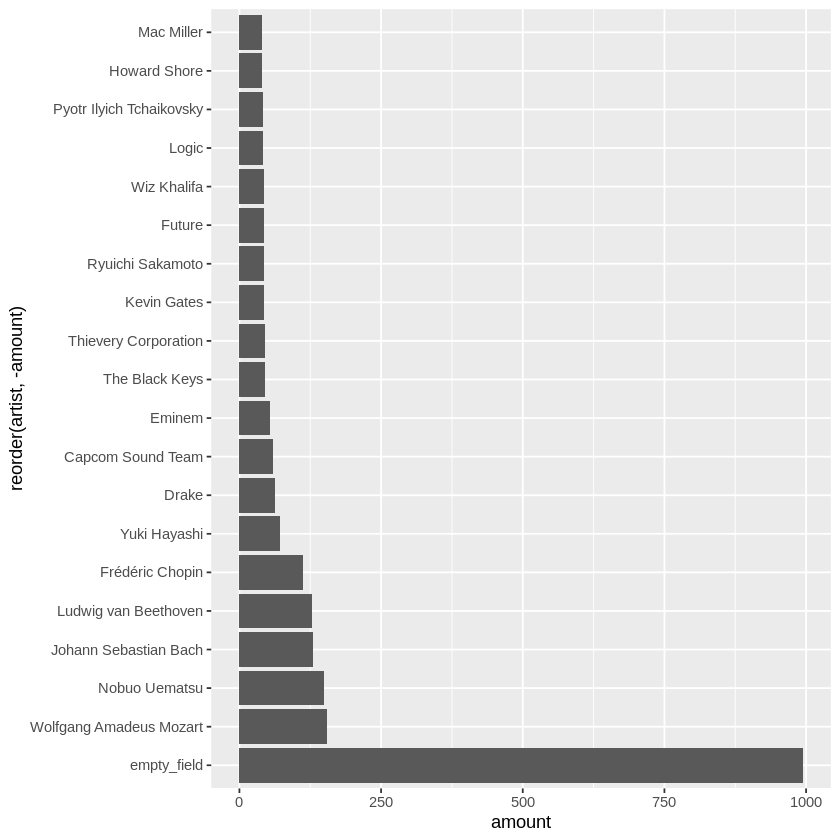

In [19]:
library(dplyr)
library(ggplot2)

new_dataframe <- arrange(new_dataframe, desc(amount)) %>%
  head(20)

ggplot(new_dataframe, aes(x = reorder(artist, -amount), y = amount)) +
  geom_col() +
  coord_flip()

Задание 4

Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.

Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [20]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.92 loaded

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(selected_cols)

  # Now:
  data %>% select(all_of(selected_cols))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


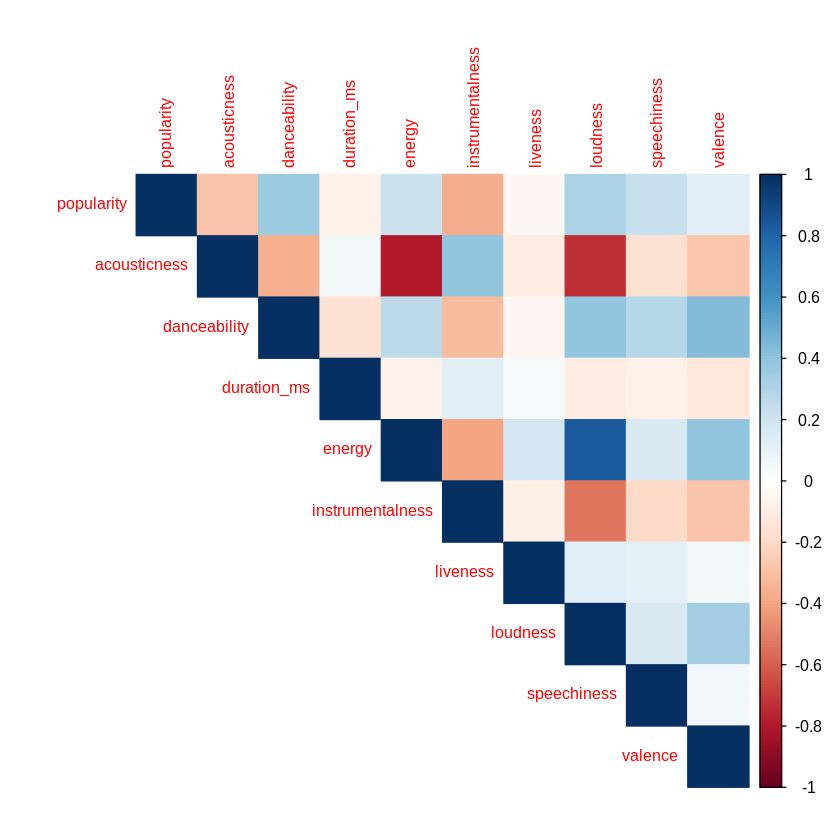

In [21]:
library(dplyr)
library(tidyr)
library(corrplot)

selected_cols <- c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")

dataset_clean <- dataset %>%
  select(selected_cols) %>%
  drop_na() %>%
  mutate_all(as.numeric)

correlation_matrix <- cor(dataset_clean)

corrplot(correlation_matrix, method = "color", type = "upper", tl.cex = 0.8)

Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

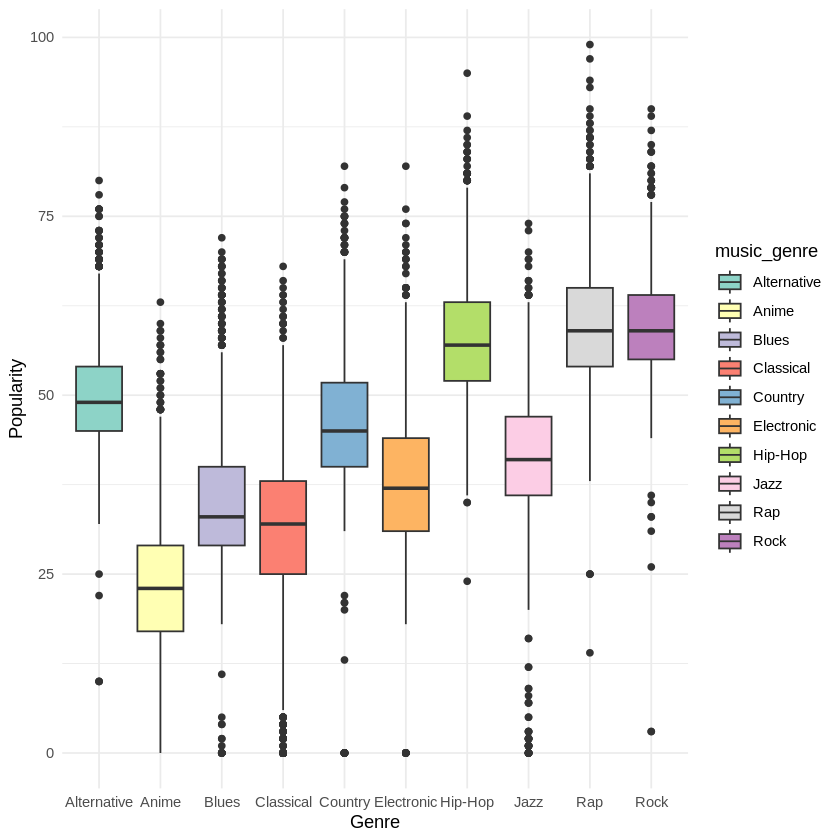

In [22]:
library(dplyr)
library(ggplot2)

dataset_popularity <- dataset %>%
  select(popularity, music_genre) %>%
  mutate(popularity = as.numeric(popularity)) %>%
  drop_na() %>%
  mutate(music_genre = factor(music_genre))

ggplot(dataset_popularity, aes(x = music_genre, y = popularity, fill = music_genre)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set3") +
  labs(x = "Genre", y = "Popularity") +
  theme_minimal()

Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. 
Отрицательные и положительные значения характеристик показывайте разными цветами.

In [25]:
# calculating for each genre
genre_popularity <- tapply(dataset$popularity, dataset$music_genre, mean)
dataset_popularity <- data.frame(genre = names(genre_popularity), popularity = genre_popularity)

# converting
dataset_popularity$genre <- as.character(dataset_popularity$genre)
dataset_popularity$popularity <- as.numeric(dataset_popularity$popularity)

# finding
min_genre <- dataset_popularity$genre[which.min(dataset_popularity$popularity)]
max_genre <- dataset_popularity$genre[which.max(dataset_popularity$popularity)]

# extracting
minmax_cols <- c("acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")

# creating dataframes
dataset_min <- dataset[dataset$music_genre == min_genre, minmax_cols, drop = FALSE]
min_means <- colMeans(dataset_min, na.rm = TRUE)

dataset_max <- dataset[dataset$music_genre == max_genre, minmax_cols, drop = FALSE]
max_means <- colMeans(dataset_max, na.rm = TRUE)

print(max_means)

    acousticness     danceability           energy instrumentalness 
      0.17011796       0.69827861       0.65318109       0.00897868 
        liveness         loudness      speechiness          valence 
      0.20012119      -6.65905522       0.18718488       0.45906597 


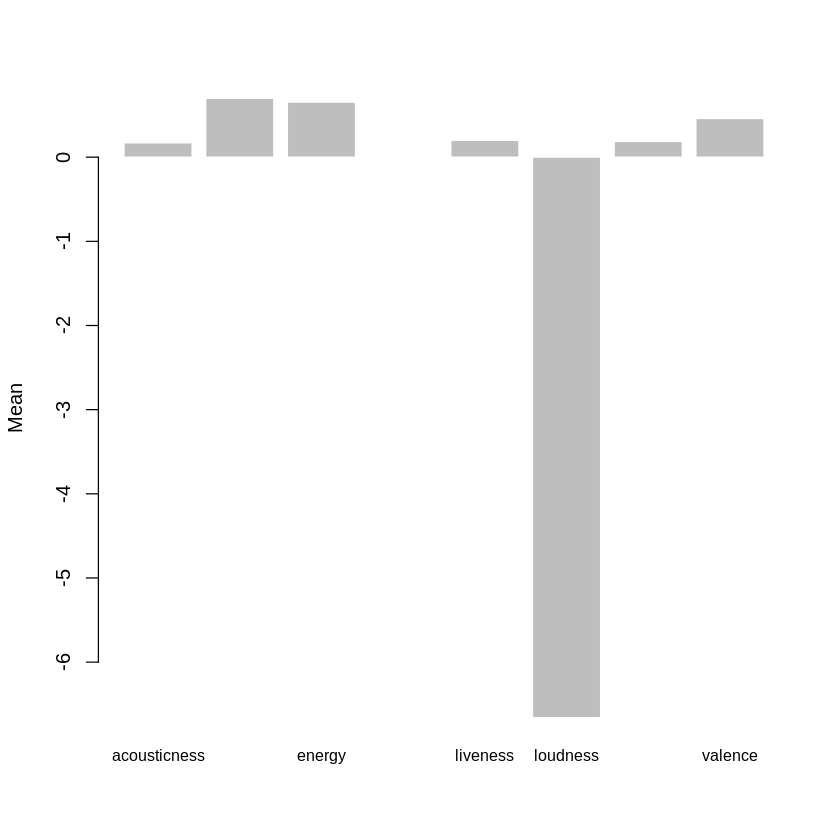

In [26]:
barplot(max_means, 
        ylab = "Mean",
        col = "grey",
        border = "white",
        cex.names = 0.8)

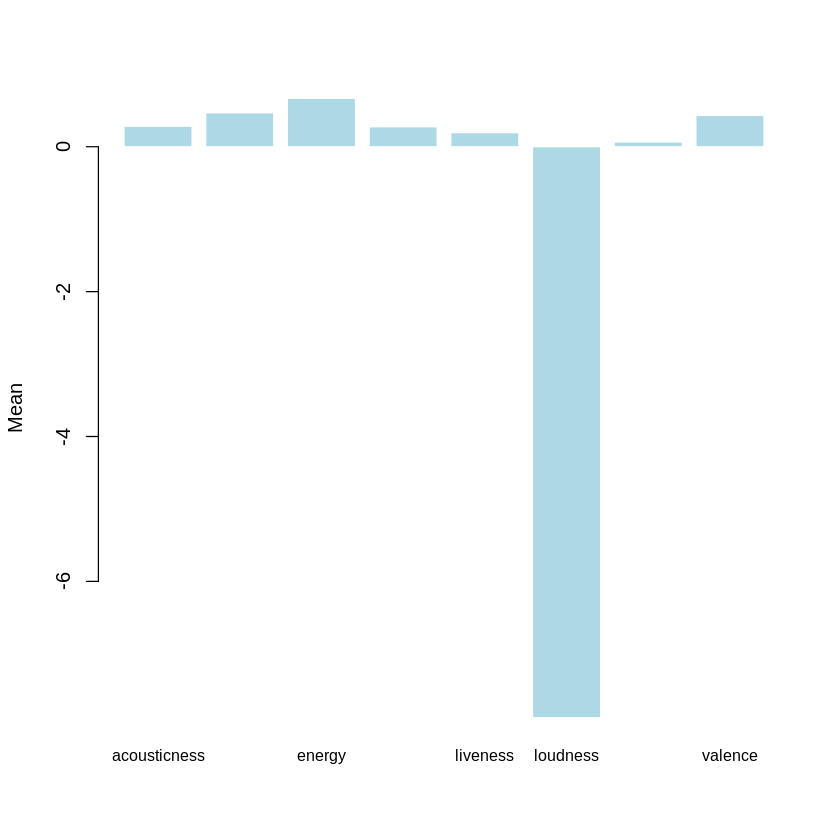

In [27]:
barplot(min_means, 
        ylab = "Mean",
        col = "lightblue",
        border = "white",
        cex.names = 0.8)

Задание 8

Добавьте в данные категориальный столбец длительность_трека, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
Покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности.

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.


Warning message:
“Removed 3 rows containing non-finite values (`stat_density()`).”


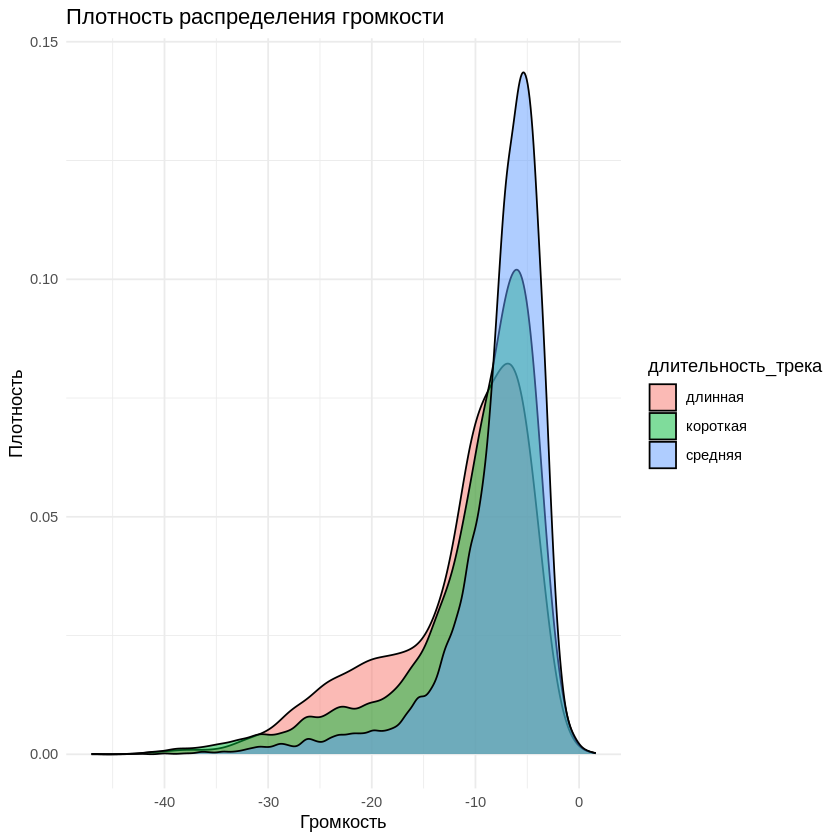

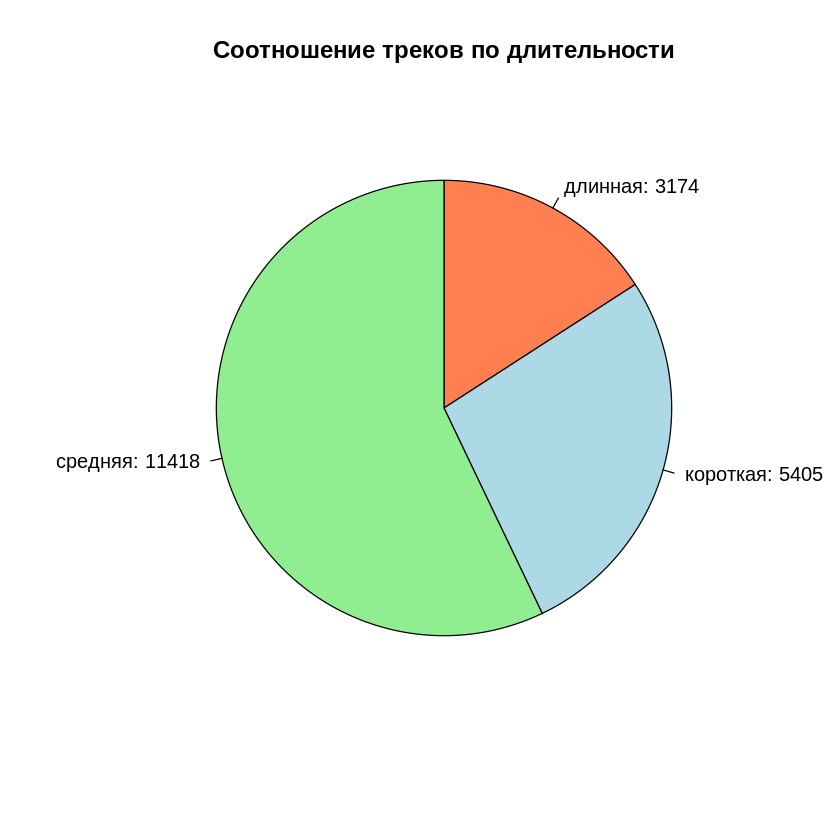

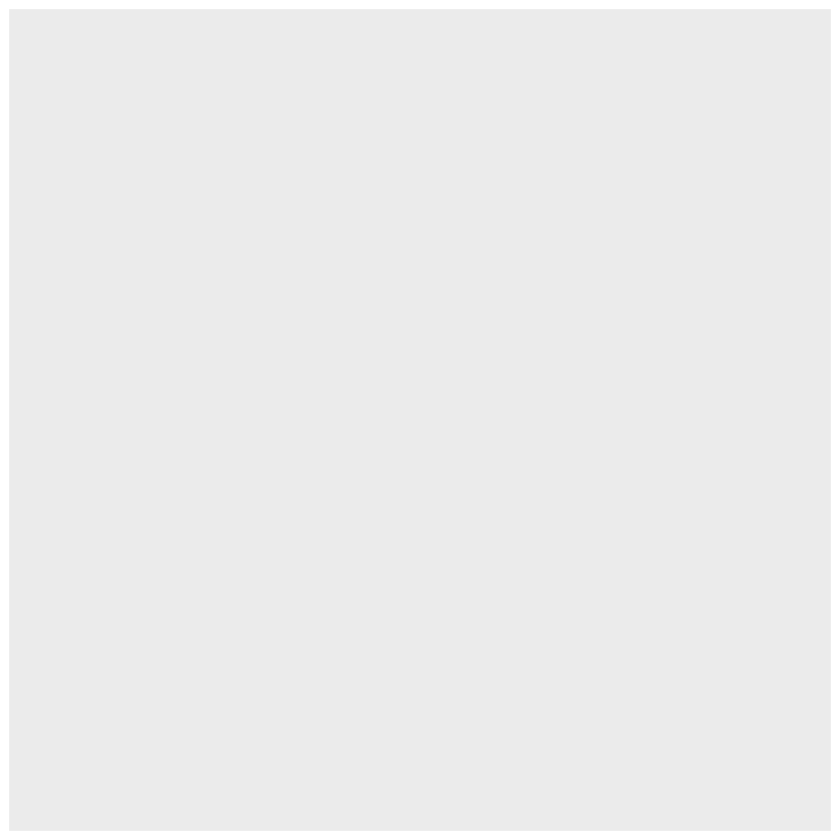

In [36]:
library(ggplot2)
dataset$длительность_трека <- ifelse(dataset$duration_ms <= 3*60*1000, "короткая",
                          ifelse(dataset$duration_ms > 3*60*1000 & dataset$duration_ms <= 5*60*1000, "средняя", "длинная"))

ggplot(dataset, aes(x = loudness, fill = длительность_трека)) +
  geom_density(alpha = 0.5) +
  ggtitle("Плотность распределения громкости") +
  xlab("Громкость") +
  ylab("Плотность") +
  theme_minimal()

duration_table <- table(dataset$длительность_трека)

donut_labels <- paste0(names(duration_table), ": ", duration_table)
donut_colors <- c("coral", "lightblue", "lightgreen")

pie(duration_table, labels = donut_labels, col = donut_colors, main = "Соотношение треков по длительности", clockwise = TRUE, init.angle = 90)
